In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression , Ridge , LogisticRegression
from sklearn.preprocessing import LabelEncoder , PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_squared_error
from scipy import stats
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from graphviz import Source
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix , classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")

plt.style.use('fivethirtyeight')

In [2]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn import preprocessing

In [4]:
train=pd.read_csv('C:\\Users\\jurk\\Desktop\\Breast_cancer\\train.csv', index_col=[0])
train.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
68,859471,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,...,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750,B
181,873593,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,...,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840,M
63,859196,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,...,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490,B
248,88466802,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,...,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147,B
60,858970,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,...,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020,B


In [5]:
def dataset_overview(data, col):
    
    print("------------")
    #print(data.head())
    print("-----------")
    print("---------------")

    print(data.columns)
    print("------------")
    print("---------------")

    print("Shape of the dataset")
    print(data.shape)
    print("-------------")
    print("---------------")

    print("Null Value counts")
    print(data.isnull().sum())
    print("-------------")
    print("---------------")

    print("dataset informaation")
    print(data.info())
    print("---------------")
    print("---------------")
    
    print("The outcome values",data[col].value_counts(normalize=True))
    plt.figure(figsize=(10,5))
    print(sns.countplot(x=col, data=data))
    plt.show()

------------
-----------
---------------
Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis'],
      dtype='object')
------------
---------------
Shape of the dataset
(455, 32)
-------------
---------------
Null Value counts
id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           

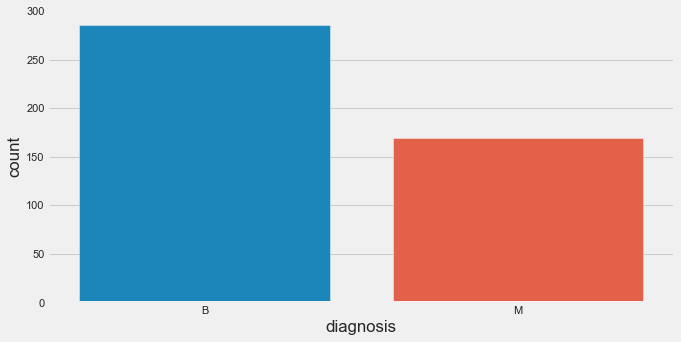

In [6]:
dataset_overview(train, 'diagnosis')


In [7]:
for _ in train.columns:
    print("The number of null values in:{} == {}".format(_, train[_].isnull().sum()))

The number of null values in:id == 0
The number of null values in:radius_mean == 0
The number of null values in:texture_mean == 0
The number of null values in:perimeter_mean == 0
The number of null values in:area_mean == 0
The number of null values in:smoothness_mean == 0
The number of null values in:compactness_mean == 0
The number of null values in:concavity_mean == 0
The number of null values in:concave points_mean == 0
The number of null values in:symmetry_mean == 0
The number of null values in:fractal_dimension_mean == 0
The number of null values in:radius_se == 0
The number of null values in:texture_se == 0
The number of null values in:perimeter_se == 0
The number of null values in:area_se == 0
The number of null values in:smoothness_se == 0
The number of null values in:compactness_se == 0
The number of null values in:concavity_se == 0
The number of null values in:concave points_se == 0
The number of null values in:symmetry_se == 0
The number of null values in:fractal_dimension_s

In [8]:
#from sklearn.externals import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings("ignore")

In [9]:
def correlation_matrix(data):
    corr = data.corr().round(2)

    # Mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set figure size
    f, ax = plt.subplots(figsize=(20, 20))

    # Define custom colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap
    d=sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

    plt.tight_layout()
    return d

<AxesSubplot:>

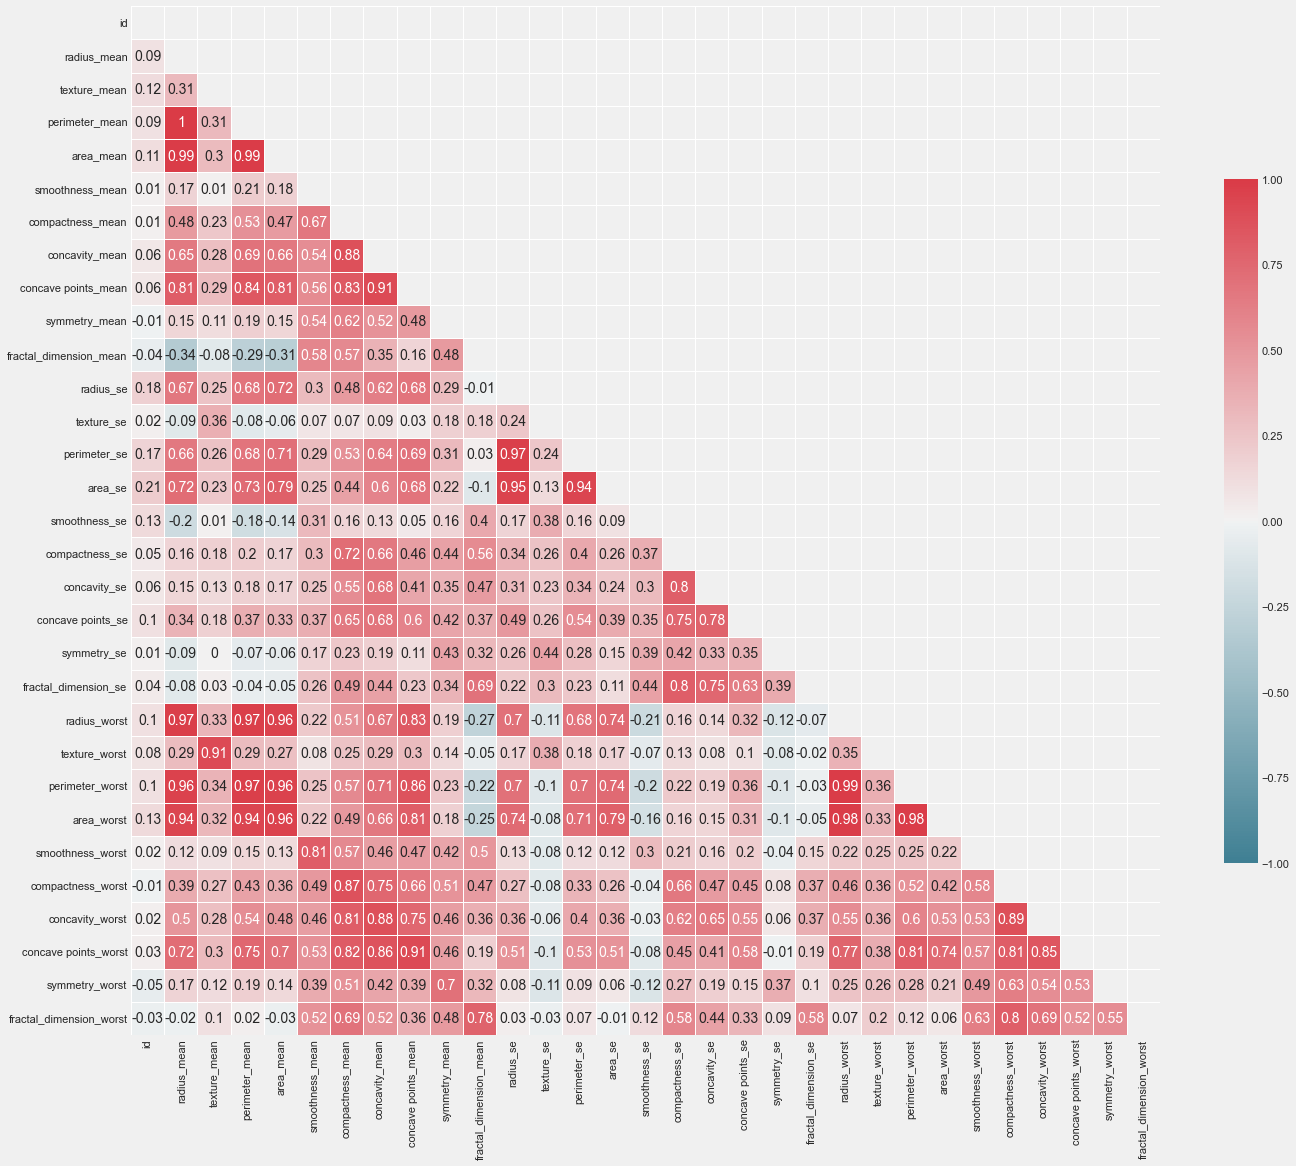

In [10]:
correlation_matrix(train)


In [11]:
def label_encoding(data, col):
    label_encoder = preprocessing.LabelEncoder()
    data[col]=label_encoder.fit_transform(data[col])
    return data[col].head()

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 68 to 102
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       455 non-null    int64  
 1   radius_mean              455 non-null    float64
 2   texture_mean             455 non-null    float64
 3   perimeter_mean           455 non-null    float64
 4   area_mean                455 non-null    float64
 5   smoothness_mean          455 non-null    float64
 6   compactness_mean         455 non-null    float64
 7   concavity_mean           455 non-null    float64
 8   concave points_mean      455 non-null    float64
 9   symmetry_mean            455 non-null    float64
 10  fractal_dimension_mean   455 non-null    float64
 11  radius_se                455 non-null    float64
 12  texture_se               455 non-null    float64
 13  perimeter_se             455 non-null    float64
 14  area_se                  

In [13]:
train.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis'],
      dtype='object')

# Pipeline Uisng the Logistic Regression  
>Categorical feature

In [14]:
categorical_features=[]
categorical_transformer = Pipeline(
    [
        ('imputer_cat', SimpleImputer(strategy = 'constant', fill_value = 'missing')),
        ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ]
)

# Numerical features


In [15]:
numeric_features=['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

numeric_transformer = Pipeline(
    [
        ('imputer_num', SimpleImputer(strategy = 'median')),
        ('scaler', StandardScaler())
    ]
)

In [16]:
preprocessor = ColumnTransformer(
    [
        ('categoricals', categorical_transformer, categorical_features),
        ('numericals', numeric_transformer, numeric_features)
    ],
    remainder = 'drop'
)

In [17]:
pipeline = Pipeline(
    [
        
        ('preprocessing', preprocessor),
        ('clf', LogisticRegression())
    ]
)

In [18]:
params = {
    'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'clf__penalty': ['l1', 'l2', 'elasticnet', None],
    'clf__C': [0.01, 0.1, 1, 10, 100],
    'clf__random_state': [42]
}

In [19]:
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV


In [34]:
cv = KFold(2, shuffle=True, random_state=42)


In [35]:
warnings.filterwarnings('ignore')
ramd_grid = RandomizedSearchCV(pipeline, params, scoring="f1", n_jobs=-1, cv=cv, n_iter=200, verbose=1, random_state=42)

In [22]:
label_encoding(train, 'diagnosis')


68     0
181    1
63     0
248    0
60     0
Name: diagnosis, dtype: int32

In [23]:
X=train.drop('diagnosis', axis=1)
y=train.diagnosis

In [36]:
import warnings
ramd_grid.fit(X,y)

Fitting 2 folds for each of 200 candidates, totalling 400 fits


RandomizedSearchCV(cv=KFold(n_splits=2, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('categoricals',
                                                                               Pipeline(steps=[('imputer_cat',
                                                                                                SimpleImputer(fill_value='missing',
                                                                                                              strategy='constant')),
                                                                                               ('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               []),
                                                                 

In [37]:
ramd_grid.best_params_


{'clf__n_estimators': 10,
 'clf__min_samples_leaf': 5,
 'clf__max_leaf_nodes': 10,
 'clf__max_depth': 5,
 'clf__criterion': 'gini'}

In [38]:
# Get the performance of the model in the train set
y_pred_train_rf = ramd_grid.predict(X)
print(classification_report(y, y_pred_train_rf))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       286
           1       0.98      0.97      0.98       169

    accuracy                           0.98       455
   macro avg       0.98      0.98      0.98       455
weighted avg       0.98      0.98      0.98       455



# Pipeline Using Random Forest

In [27]:
pipeline = Pipeline(
    [
        ('preprocessing', preprocessor),
        ('clf', RandomForestClassifier())
    ]
)

In [28]:
params={ "clf__n_estimators": [10, 100, 1000],
         "clf__criterion": ['gini', 'entropy'],
                 "clf__max_depth":[5,8,15,25,30,None],
                 "clf__min_samples_leaf":[1,2,5,10,15,100],
                 "clf__max_leaf_nodes": [2, 5,10]
       }

In [29]:
cv = KFold(2, shuffle=True, random_state=42)


In [30]:
warnings.filterwarnings('ignore')
ramd_grid_rf = RandomizedSearchCV(pipeline, params, scoring="f1", n_jobs=-1, cv=cv, n_iter=200, verbose=1, random_state=42)

In [31]:
import warnings
ramd_grid_rf.fit(X,y)

Fitting 2 folds for each of 200 candidates, totalling 400 fits


RandomizedSearchCV(cv=KFold(n_splits=2, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('categoricals',
                                                                               Pipeline(steps=[('imputer_cat',
                                                                                                SimpleImputer(fill_value='missing',
                                                                                                              strategy='constant')),
                                                                                               ('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               []),
                                                                 

In [32]:
ramd_grid_rf.best_params_


{'clf__n_estimators': 10,
 'clf__min_samples_leaf': 5,
 'clf__max_leaf_nodes': 10,
 'clf__max_depth': 8,
 'clf__criterion': 'entropy'}

In [33]:
# Get the performance of the model in the train set
y_pred_train_rf = ramd_grid_rf.predict(X)
print(classification_report(y, y_pred_train_rf))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       286
           1       0.99      0.95      0.97       169

    accuracy                           0.98       455
   macro avg       0.98      0.97      0.98       455
weighted avg       0.98      0.98      0.98       455



# Pipeline Using XGBoost

In [39]:
preprocessor = ColumnTransformer(
    [
        ('categoricals', categorical_transformer, categorical_features),
        ('numericals', numeric_transformer, numeric_features)
    ],
    remainder = 'drop'
)

In [40]:
# Create the pipeline, with the tranformer and the model
pipeline = Pipeline(
    [
        ('preprocessing', preprocessor),
        ('clf', XGBClassifier())
    ]
)

In [41]:
params={
        "clf__n_estimators": np.arange(50, 750, 50), 
        "clf__max_depth": np.arange(2, 10, 1),
        'clf__lambda': [0.5,0.75,1,1.5],
        'clf__alpha': [0,0.5,0.75,1,1.5]
    }

In [42]:
cv = KFold(2, shuffle=True, random_state=42)


In [44]:
warnings.filterwarnings('ignore')
ramd_grid_xb = RandomizedSearchCV(pipeline, params, scoring="f1", n_jobs=-1, cv=cv, n_iter=200, verbose=1, random_state=42)

In [45]:
import warnings
ramd_grid_xb.fit(X,y)

Fitting 2 folds for each of 200 candidates, totalling 400 fits
[13:29:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=KFold(n_splits=2, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('categoricals',
                                                                               Pipeline(steps=[('imputer_cat',
                                                                                                SimpleImputer(fill_value='missing',
                                                                                                              strategy='constant')),
                                                                                               ('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               []),
                                                                 

In [47]:
ramd_grid_xb.best_params_


{'clf__n_estimators': 400,
 'clf__max_depth': 2,
 'clf__lambda': 1,
 'clf__alpha': 0}

In [48]:
# Get the performance of the model in the train set
y_pred_train_xb = ramd_grid_xb.predict(X)
print(classification_report(y, y_pred_train_xb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       286
           1       1.00      1.00      1.00       169

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



# Saving the pipeline in pickle file

In [49]:
import pickle
from joblib import dump, load

In [50]:
dump(ramd_grid_xb, 'breast_cancer_pipe.joblib') 


['breast_cancer_pipe.joblib']

In [54]:
def prediction_pickle(path_model, path_data):
    s=load(path_model)
    input_data = pd.read_csv(path_data)
    prediction=s.predict(input_data)
    input_data['prediction'] = prediction
    return input_data

In [65]:
path_model_xb='C:\\Users\\jurk\\Desktop\\Breast_cancer\\breast_cancer_pipe.joblib'
path_data_xb='C:\\Users\\jurk\\Desktop\\Breast_cancer\\test.csv'

In [66]:
prediction_pickle(path_model_xb, path_data_xb)


,Unnamed: 0,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,prediction
0,204,87930,12.47,18.60,81.09,481.9,0.09965,0.10580,0.08005,0.03821,...,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750,0
1,70,859575,18.94,21.31,123.60,1130.0,0.09009,0.10290,0.10800,0.07951,...,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589,1
2,131,8670,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,...,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019,1
3,431,907915,12.40,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,...,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359,0
4,540,921385,11.54,14.44,74.65,402.9,0.09984,0.11200,0.06737,0.02594,...,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,486,913102,14.64,16.85,94.21,666.0,0.08641,0.06698,0.05192,0.02791,...,25.44,106.00,831.0,0.1142,0.2070,0.2437,0.07828,0.2455,0.06596,0
110,75,8610404,16.07,19.65,104.10,817.7,0.09168,0.08424,0.09769,0.06638,...,24.56,128.80,1223.0,0.1500,0.2045,0.2829,0.15200,0.2650,0.06387,1
111,249,884689,11.52,14.93,73.87,406.3,0.10130,0.07808,0.04328,0.02929,...,21.19,80.88,491.8,0.1389,0.1582,0.1804,0.09608,0.2664,0.07809,0
112,238,883270,14.22,27.85,92.55,623.9,0.08223,0.10390,0.11030,0.04408,...,40.54,102.50,764.0,0.1081,0.2426,0.3064,0.08219,0.1890,0.07796,0
